In [19]:
import	numpy	as	np
import sys
np.set_printoptions(threshold=sys.maxsize)
import	pandas	as	pd
import	warnings
import	matplotlib.pyplot	as	plt
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv('mouse.txt', sep=' ')
data.head(25)
np_data = np.array(data)
print(np_data.shape)

(499, 2)


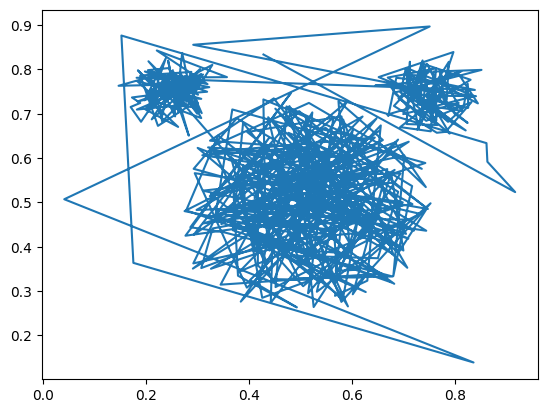

In [21]:
X = np_data[:, 0]
Y = np_data[:, 1]
plt.plot(X, Y)

plt.show()


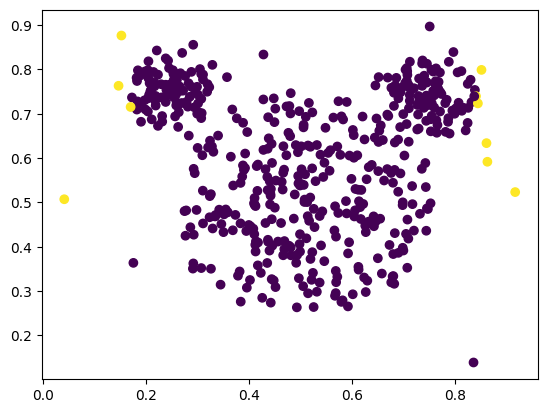

In [22]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

from sklearn.ensemble import IsolationForest

X = X.reshape(-1,1)

clf = IsolationForest(random_state=0, contamination = 0.02).fit(X)
scores = clf.score_samples(X)
predict = clf.predict(X)
y_pred_test = np.where(predict == -1, 1, 0)
plt.scatter(X, Y, c=y_pred_test)
plt.show()

In [23]:
data = pd.read_csv('creditcard.csv', sep=',')
data.head(25)
np_data = np.array(data)
print(np_data.shape)

(284807, 31)


In [24]:
X = np_data[:, 1:29]
Y = np_data[:, 30]
# print(np_data['Class'])
indices_un = np.where(Y == 1) 
indices_zero = np.where(Y == 0)[0]

cl_un = np_data[indices_un]

random_indices_zero =  np.random.choice(indices_zero, size=5000, replace=False)
cl_zero = np_data[random_indices_zero]

print(cl_zero.shape)
print(cl_un.shape)

resultat = np.concatenate((cl_zero, cl_un), axis=0)
print(resultat.shape)
X = resultat[:, 1:29]
Y = resultat[:, 30]

(5000, 31)
(492, 31)
(5492, 31)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0, contamination = 0.05).fit(X_train)
predict_test = clf.predict(X_test)
y_pred_test = np.where(predict_test == -1, 1, 0)

predict_train = clf.predict(X_train)
y_pred_train = np.where(predict_train == -1, 1, 0)

print('Train shape : ', y_pred_train.shape)
print('X_train shape', X_train.shape)
print('Test shape : ', y_pred_test.shape)
print('X_test shape', X_test.shape)

print()

Train shape :  (4393,)
X_train shape (4393, 28)
Test shape :  (1099,)
X_test shape (1099, 28)



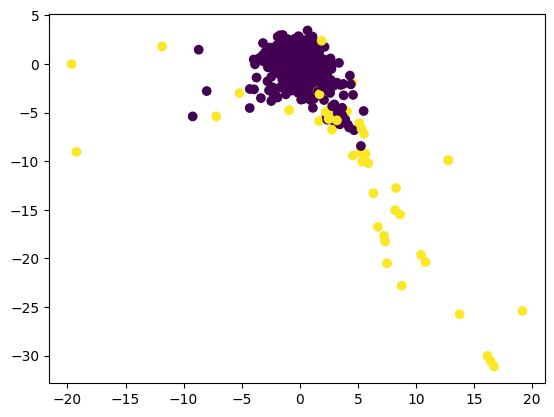

In [26]:
# a1 = plt.scatter(X_train[: ,1], X_train[: ,2], c=y_pred_train)
a2 = plt.scatter(X_test[: ,1], X_test[: ,2], c=y_pred_test)
# plt.legend([a1, a2], ["X_train", "X_test"])
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(Y_test, y_pred_test)
recall = recall_score(Y_test, y_pred_test)
confusion = confusion_matrix(Y_test, y_pred_test)

print("accuracy : ", accuracy)
print("recall : ", recall)
print("confusion : ", confusion)


accuracy :  0.9554140127388535
recall :  0.49411764705882355
confusion :  [[1008    6]
 [  43   42]]
